In [6]:
from pydicom import dcmread
from pydicom.data import get_testdata_files

#讀取 DCM
filename = '012_se_mc/012-001.dcm'
ds = dcmread(filename)

print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 178
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.2.32.35063.2014102921213020949761792
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.12.2.1107.5.2
(0002, 0013) Implementation Version Name         SH: 'MR_VB17A'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'ND']
(0008, 0012) Instance Creation Date              DA: '20141029'
(0008, 0013) Instance Creation Time              TM: '212130.593000'
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID  

[DCM Table](https://www.dicomlibrary.com/dicom/dicom-tags/)

In [7]:
# Echo time
print(ds[0x18,0x81].value)

13.6


(256, 256)
uint16


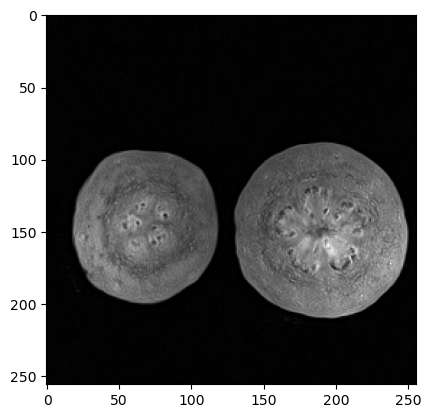

In [8]:
import matplotlib.pyplot as plt

# information of image
print(ds.pixel_array.shape)
print(ds.pixel_array.dtype)

# 以 matplotlib 繪製影像
plt.imshow(ds.pixel_array,cmap='gray')
plt.show()



In [9]:
from time import sleep
import numpy as np
tmp = np.zeros((256,256,24))
echoTime = list()

for i in range(24):
    if i < 9 :
        filename=('012_se_mc/012-00'+str(i+1)+'.dcm')
    else:
        filename=('012_se_mc/012-0'+str(i+1)+'.dcm')
    print(filename)
    ds=dcmread(filename)
    tmp[:,:,i]=ds.pixel_array
    echoTime.append(ds[0x18,0x81].value)

012_se_mc/012-001.dcm
012_se_mc/012-002.dcm
012_se_mc/012-003.dcm
012_se_mc/012-004.dcm
012_se_mc/012-005.dcm
012_se_mc/012-006.dcm
012_se_mc/012-007.dcm
012_se_mc/012-008.dcm
012_se_mc/012-009.dcm
012_se_mc/012-010.dcm
012_se_mc/012-011.dcm
012_se_mc/012-012.dcm
012_se_mc/012-013.dcm
012_se_mc/012-014.dcm
012_se_mc/012-015.dcm
012_se_mc/012-016.dcm
012_se_mc/012-017.dcm
012_se_mc/012-018.dcm
012_se_mc/012-019.dcm
012_se_mc/012-020.dcm
012_se_mc/012-021.dcm
012_se_mc/012-022.dcm
012_se_mc/012-023.dcm
012_se_mc/012-024.dcm


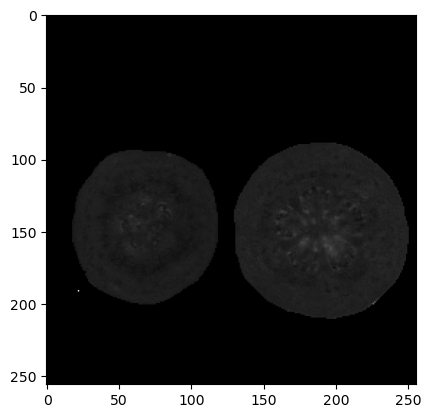

In [94]:
from scipy.optimize import curve_fit

T2map = np.zeros((256,256))
for i in range(ds.pixel_array.shape[0]):
    for j in range(ds.pixel_array.shape[1]):
        if tmp[i,j,0] < 250: continue
        x = list()
        y = list()
        for img in range(24):
            if (img%2 == 0):
                x.append(echoTime[img])
                y.append((tmp[i,j,img]))
        coef=curve_fit(lambda t,a,b: a*np.exp(-t/b),  x,  y, p0=(y[0],x[5]))
        #coef = M0, TE
        T2map[i,j] = coef[0][1]
        #print(TE)

plt.imshow(T2map,cmap='gray')
plt.show()
